### 1) Problem statement. 

"Trips & Travel.Com" company wantst to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient. 

### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [1]:
## importing important libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/Machine_learning/Random_forest/Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Data Cleaning 

##### Handling Missing Values 

1. Handling Missing values 
2. Handling Duplicates 
3. Check data type 
4. Understand the dataset 

In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
### Check all the categories 
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [6]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [7]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [8]:
### Checking Missing Values 
## These are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing values ')

Age 4.62357 % missing values 
TypeofContact 0.51146 % missing values 
DurationOfPitch 5.13502 % missing values 
NumberOfFollowups 0.92062 % missing values 
PreferredPropertyStar 0.53191 % missing values 
NumberOfTrips 2.86416 % missing values 
NumberOfChildrenVisiting 1.35025 % missing values 
MonthlyIncome 4.76678 % missing values 


In [9]:
# statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values 
1. Impute Median value for Age column 
2. Impute Mode for Type of Contract 
3. Impute Median for Duration of Pitch 
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar 
6. Impute Median for NumberofTrips 
7. Impute Mode for NumberOfChildrenVisiting 
8. Impute Median for MonthlyIncome

In [10]:
# Age 
df.Age.fillna(df.Age.median(),inplace=True)

#TypeofContract 
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

#NumberOfFollowups 
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

#NumberOfTrips 
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

#NumberofChildrenVisiting 
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [11]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [12]:
df.drop('CustomerID',inplace=True,axis=1)

In [13]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0



## Feature Engineering 

#### Feature Extraction

In [14]:
# create new column for feature 
df['TotalVisiting']=df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [15]:
## get all the numeric features 
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print('Num of Numerical Features:', len(num_features))

Num of Numerical Features: 12


In [16]:
## Categorical features 
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Num of Categorical Features:', len(cat_features))

Num of Categorical Features: 6


In [17]:
## Discrete Features 
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features:',len(discrete_features))

Num of Discrete Features: 9


In [18]:
## Continuous Features 
continous_features=[feature for feature in num_features if len(df[feature].unique())>25]
print('Num of Continous Features:',len(continous_features))

Num of Continous Features: 3


### Train Test Split And Model Training

In [19]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [20]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [21]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [22]:
# separate dataset into train and test 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [23]:
# Create Column Transformer with 3 types of Transformers 
cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [24]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [25]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

## Random Forest Classifier Training

In [27]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,\
    ConfusionMatrixDisplay,\
    precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [28]:
models={
    'Random Forest':RandomForestClassifier(),
    'Adaboost':AdaBoostClassifier(),
    'GradientBoost':GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make predictions 
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Training set performance 
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roauc_score=roc_auc_score(y_train,y_train_pred)

    #Test Set Performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roauc_score=roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_roauc_score))

    print('----------------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_roauc_score))

    print('='*35)
    print('\n')


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------------
Model performance for Test set
- Accuracy: 0.9315
- F1 score: 0.9263
- Precision: 0.9769
- Recall: 0.6649
- Roc Auc Score: 0.8306


Adaboost
Model performance for Training set
- Accuracy: 0.8565
- F1 score: 0.8365
- Precision: 0.7308
- Recall: 0.3649
- Roc Auc Score: 0.6670
----------------------------------------
Model performance for Test set
- Accuracy: 0.8354
- F1 score: 0.8115
- Precision: 0.6630
- Recall: 0.3194
- Roc Auc Score: 0.6400


GradientBoost
Model performance for Training set
- Accuracy: 0.8939
- F1 score: 0.8819
- Precision: 0.8756
- Recall: 0.5021
- Roc Auc Score: 0.7429
----------------------------------------
Model performance for Test set
- Accuracy: 0.8589
- F1 score: 0.8398
- Precision: 0.7732
- Recall: 0.3927
- Roc Auc Score: 0.6824




In [31]:
## Hyperparameter Tuning 
rf_params={
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,'auto',8],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500,1000]
}
gradient_params={
    'loss':['log_loss','deviance','exponential'],
    'criterion':['friedman_mse','squared_error','mse'],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500,1000],
    'max_depth':[5,8,15,None,10]

}

In [32]:
rf_params,gradient_params

({'max_depth': [5, 8, 15, None, 10],
  'max_features': [5, 7, 'auto', 8],
  'min_samples_split': [2, 8, 15, 20],
  'n_estimators': [100, 200, 500, 1000]},
 {'loss': ['log_loss', 'deviance', 'exponential'],
  'criterion': ['friedman_mse', 'squared_error', 'mse'],
  'min_samples_split': [2, 8, 15, 20],
  'n_estimators': [100, 200, 500, 1000],
  'max_depth': [5, 8, 15, None, 10]})

In [33]:
#Models List for Hyperparameter tuning 
randomcv_models=[
    ('GB',GradientBoostingClassifier(),gradient_params),
    ('RF',RandomForestClassifier(),rf_params)
]

In [34]:
randomcv_models

[('GB',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error', 'mse'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000],
   'max_depth': [5, 8, 15, None, 10]}),
 ('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [35]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name,model, params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"------------------Best Params for {model_name}--------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[CV] END criterion=squared_error, loss=deviance, max_depth=10, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, loss=deviance, max_depth=5, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, loss=deviance, max_depth=5, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END criterion=squared_error, loss=deviance, max_depth=10, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, loss=deviance, max_depth=10, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END criterion=friedman_mse, loss=deviance, max_depth=5, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END criterion=friedman_mse, loss=log_loss, max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END criterion=friedman_mse, loss=log_loss, max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END criterion=squared_error, lo

In [37]:
models={
    'Random Forest':RandomForestClassifier(n_estimators=200,min_samples_split=2,max_features=8,max_depth=None),
    'Gradient Boost':GradientBoostingClassifier(n_estimators=1000,min_samples_split=15,max_depth=15,loss='exponential',criterion='friedman_mse')
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make predictions 
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Training set performance 
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roauc_score=roc_auc_score(y_train,y_train_pred)

    #Test Set Performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roauc_score=roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_roauc_score))

    print('----------------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_roauc_score))

    print('='*35)
    print('\n')


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------------
Model performance for Test set
- Accuracy: 0.9376
- F1 score: 0.9338
- Precision: 0.9643
- Recall: 0.7068
- Roc Auc Score: 0.8502


Gradient Boost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------------
Model performance for Test set
- Accuracy: 0.9632
- F1 score: 0.9620
- Precision: 0.9814
- Recall: 0.8272
- Roc Auc Score: 0.9117




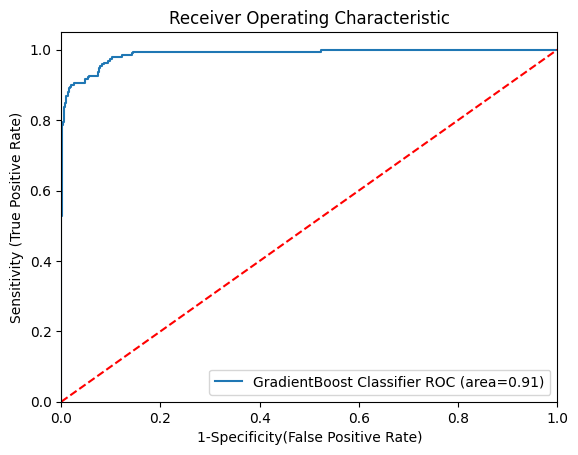

In [38]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

auc_models=[
    {
        'label':'GradientBoost Classifier',
        'model':GradientBoostingClassifier(n_estimators=1000,min_samples_split=15,max_depth=15,loss='exponential',criterion='friedman_mse'),
        'auc': 0.9117
    },

]
# create loop through all model 
for algo in auc_models:
    model=algo['model']#select the model 
    model.fit(X_train,y_train)# train the model 
    #compute False positive rate and True positive rate
    fpr,tpr,thresolds=roc_curve(y_test,model.predict_proba(X_test)[:, 1])
    #calculate area under the curve to display on the plot 
    plt.plot(fpr,tpr,label='%s ROC (area=%0.2f)'%(algo['label'],algo['auc']))
# custom setting for the plot 
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('auc.png')
plt.show()